# Analytical framework to measure the value added or subtracted by stop-loss policy

## Introduction

This notebook will simply demo the analytical framework described in [Kaminski, Kathryn M., and Andrew W. Lo. (2013)](https://dspace.mit.edu/bitstream/handle/1721.1/114876/Lo_When%20Do%20Stop-Loss.pdf).

This notebook has four main parts:
- Generate returns Series through different processes described in the paper.
- Add stop-loss policies and evaluate the influence.
- Verify propositions described in the paper.
- Compare stop-loss strategies with various parameters.

## Methodology

### Returns Series Generate
- Random Walk Hypothesis
    - $r_t = \mu + \epsilon_t, \epsilon_t \overset{iid}\sim White \, Noise(0, \sigma_\epsilon^2)$ <br />
- AR(1)
    - $r_t = \mu + \rho (r_{t-1} - \mu) + \epsilon_t, \epsilon_t \overset{iid}\sim White \, Noise(0, \sigma_\epsilon^2)$ <br />
- Regime-Switching Models
    - $r_t = I_t r_{1t} + (1 - I_t) r_{2t}, r_{it} \overset{iid}\sim \mathcal{N}(\mu_i, \sigma_i^2), i = 1, 2$
    - Markov transition probabilities matrix <br />
$\quad \quad \quad \quad I_{t+1} = 1$ $I_{t+1} = 0$ <br />
$A$ ≡ $\begin{matrix} I_{t} = 1 \\ I_{t} = 0 \end{matrix}$ $\left[ \begin{matrix} p_{11} & p_{12} \\ p_{21} & p_{22} \end{matrix} \right]$ <br />


### A Simple Stop-Loss Policy
- $R_{t}(J)$ ≡ $\sum_{j=1}^J t_{t - j + 1}$

- $s_t$ ≡ $\Bigg\{ \begin{matrix}
\,\,\, 0 \,\, if \,\, R_{t - 1}(J) \,\, \lt \,\, -\gamma \,\, and \,\, s_{t-1} = 1 \,\, (exit) \\
\,\,\,\, 1 \,\, if \,\, r_{t - 1} \,\, \geq \,\, \delta \,\, and \,\, s_{t-1} = 0 \,\, (re-enter) \\
\,\,\,\,\,\,\,\,\,\, 1 \,\, if \,\, R_{t - 1}(J) \,\, \geq \,\, -\gamma \,\, and \,\, s_{t-1} = 1 \,\, (stay \,\, in) \\
0 \,\, if \,\, r_{t - 1} \,\, \lt \,\, \delta \,\, and \,\, s_{t-1} = 0 \,\, (stay \,\, out)
\end{matrix}$ 

- $r_{st}$ ≡ $s_tr_t + (1 - s_t)r_f - \kappa|s_t − s_{t−1}|$


### Stop-Loss Policies Metrics
- $\Delta_\mu$ ≡ $E[r_{st}] - E[r_t]$
- $\Delta_{\sigma^2}$ ≡ $Var[r_{st}] - Var[r_t]$
- $\Delta_\sigma$ ≡ $\sqrt{Var[r_{st}]} - \sigma$
- $\Delta_{SR}$ ≡ $\frac{E[r_{st}] - r_f}{\sigma_s}$ - $\frac{\mu - r_f}{\sigma}$
- $stopping \, ratio$ = $\frac{\Delta \mu}{p_{0}}$, $where \, p_0$ ≡ $Prob(s_t = 0)$


## Propositions
- If $rt$ satisfies the Random Walk Hypothesis
    - $\Delta_\mu$ = $-p_0(r_f - \mu)$ = $-p_0\pi$
    - $\Delta_{\sigma^2}$ = $-p_0\sigma^2 + p_0(1 - p_0)\pi^2$
    - $\Delta_{SR}$ = $\frac{-\pi}{\sigma}$ + $\frac{\Delta_\mu + \pi}{\sqrt{\Delta_{\sigma^2}+ \sigma^2}}$
    - $stopping \, ratio$ = $-\pi$
- If $rt$ satisfies an AR(1)
    - $stopping \, ratio \geq -\pi + \rho \sigma, for \rho \ge 0 \,\, and \,\, reasonable \,\, stop-loss \,\, parameters$
- If $rt$ satisfies the two-state Markov regime-switching process
    - $\Delta_\mu$ = $p_{0, 1}(r_f - \mu_1) + p_{0, 2}(r_f - \mu_2)$ 
    - $stopping \, ratio$ = $(1 - \tilde{p}_{0, 2})(r_f - \mu_1) + \tilde{p}_{0, 2}(r_f - \mu_2)$,
$where \, p_{0, 1}$ ≡ $Prob(s_t = 0, I_t = 1)$, $p_{0, 2}$ ≡ $Prob(s_t = 0, I_t = 0)$, $\tilde{p}_{0, 2}$ ≡ $Prob(I_t = 0|s_t = 0)$
    
- Momentum strategy will benefit from a stop-loss rule, whereas a mean-reverting strategy will not.

---

## Import Library

In [57]:
import numpy as np
import pandas as pd

import data
import series_generator
import stop_loss

import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook

sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)
output_notebook()

Loading BokehJS ...

## Load Data
You can download the data online or simply load from the pkl file.

In [2]:
#Get data online
tickers = data.get_sp500_tickers()
adj_close = data.get_adj_close(tickers, 2015, 1, 1, 2020, 12, 31)
daily_return = adj_close.pct_change().dropna(how = "all", axis = 0)
daily_return.to_pickle("S&P500_Daily_Return.pkl")

[*********************100%***********************]  505 of 505 completed


In [3]:
# Get data from local pkl file
daily_return = pd.read_pickle("S&P500_Daily_Return.pkl")

---

# Example Usage of Implementations

## Part 1 - Generate returns Series

In [4]:
# Set up common parameters
start_date = "20200101"
end_date = "20201231"
step = 1
ignore_weekends = True

### Random Walk Hypothesis

In [5]:
# Set up Random Walk Hypothesis parameters
mean = 0.0005
std = 0.01

# Generate returns Series
rw_return_series = series_generator.random_walk_generater(mean, std, start_date, end_date, step, ignore_weekends)
print("mean of return:", rw_return_series.mean(), "standard deviation of return:", rw_return_series.std())

# Visualization
series_generator.trend_chart(rw_return_series, compounding = True)

mean of return: 0.00047496308290993306 standard deviation of return: 0.01022450882783756


### AR(1)

In [6]:
# Set up AR(1) parameters
mean = 0.0005
std = 0.01
rho = 0.2
r0 = 0.0005 #Initial value of the returns series

# Generate returns Series
ar_1_return_series = series_generator.ar_1_return_generater(mean, std, rho, r0, start_date, end_date, step, ignore_weekends)
print("mean of return:", ar_1_return_series.mean(), "standard deviation of return:", ar_1_return_series.std())

# Visualization
series_generator.trend_chart(ar_1_return_series, compounding = True)

mean of return: 0.0006551109489729372 standard deviation of return: 0.009800653275137539


### Regime-Switching Models

In [7]:
# Set up Regime-Switching Models parameters
mean_1 = 0.0005
std_1 = 0.01
mean_2 = 0.0001
std_2 = 0.02
I0 = 1 #Initial value of the state
trans_prob_matrix = np.array([[0.8, 0.2], [0.7, 0.3]]) #Markov transition probabilities matrix
# Generate returns Series
rsm_return_series, rsm_states = series_generator.regime_switching_return_generater(mean_1, std_1, mean_2, std_2, I0, trans_prob_matrix, 
                                                                       start_date, end_date, step, ignore_weekends)
print("mean of return:", rsm_return_series.mean(), "standard deviation of return:", rsm_return_series.std())

# Visualization
series_generator.trend_chart(rsm_return_series, compounding = True)

mean of return: 0.001980807042983283 standard deviation of return: 0.013123597613132757


### Market Data

In [8]:
# Get SPY data from yahoo finance
spy_adj_close = data.get_adj_close(["SPY"], 2015, 1, 1, 2020, 12, 31)
spy_return_series = spy_adj_close.pct_change().dropna()

# Visualization
series_generator.trend_chart(spy_return_series, compounding = True)

[*********************100%***********************]  1 of 1 completed


## Part 2.1 - Add Stop-Loss Policies

### Create StopLoss Object
Parameters:
   - strategy_return : Series contains returns of strategy.
   - rf_return : It can be a series contains returns of risk-free asset or a constant risk free rate.

Returns:
   - StopLoss object

#### Normal Usages

In [9]:
sl = stop_loss.StopLoss(strategy_return = spy_return_series, rf_return = 0.000001)

#### Errors
Index's type of strategy_return must be DatetimeIndex. 

In [10]:
spy_return_series_with_wrong_index = spy_return_series.reset_index()["Adj Close"]
sl = stop_loss.StopLoss(strategy_return = spy_return_series_with_wrong_index, rf_return = 0.000001)

TypeError: Index's type must be DatetimeIndex.

### Add Custom Stop-Loss Policies
There is a built in stop-loss policy called "simple_stop_loss_policy", but users can add their custom policies to the object.

Parameters:
   - policy : Function with returns Series as the first parameter and proportions Series as the output.

Returns:
   - None


In [11]:
# Define a custom policy 
def ma_policy(strategy_return, len_1, len_2):
    """Simple stop-loss policy using moving average"""
    # Calculate MA
    ma1 = strategy_return.rolling(len_1).mean()
    ma2 = strategy_return.rolling(len_2).mean()
    
    # Create Series contains proportions of assets allocated.
    st = strategy_return.copy()
    st[:] = 1

    condition = (ma1 >= ma2)
     
    for i in range(len_2, len(st)):
        st[i] = condition[i - 1]

    return st

In [12]:
sl.add_custom_policy(ma_policy)

## Part 2.2 - Evaluate the Influence

### Calculation
Parameters:
   - policy_name : Name of the policy
   - config : Dictionary contains the policy function parameters except the first parameter.
   - kappa : One-way transactions cost of a stop-loss event
    
Returns:
   - performance: Dictionary contains performance metrics.
   - rst: Returns series with the stop-loss policy.

In [13]:
# Built in policy
policy_name = "simple_stop_loss_policy"
config = {"gamma" : 0.1, "delta" : 0.01, "J" : 20, "compounding" : True}
kappa = 0

performance, rst = sl.evaluate(policy_name, config, kappa)

In [14]:
# Custom policy
policy_name = "ma_policy"
config = {"len_1" : 10, "len_2" : 20}
kappa = 0

performance, rst = sl.evaluate(policy_name, config, kappa)

### Visualization
#### Trend Chart
Parameters
   - policy_names : List of selected policy names
   - compounding : Whether returns are reinvested back into the account.
   - height : Height of the plot
   - width : Width of the plot
            
Returns
   - None
   
#### Performace Table
Parameters
   - policy_names : List of selected policy names
   - decimals : Number of decimal places to round
   - height : Height of the table
   - width : Width of the table
            
Returns
   - None

In [15]:
# Get calculated result
calculated_performance = sl.get_performance_result()

# Get list of policy_names
policy_names = list(calculated_performance.keys())

In [16]:
# Trend Chart
sl.trend_chart(policy_names, compounding = True, height = 350, width = 800)

In [17]:
# Performace Table
sl.performace_table(policy_names, decimals = 5, height = 300, width = 900)

## Part 3 - Verify Propositions

### Random Walk Hypothesis
If $r_t$ satisfies the Random Walk Hypothesis
   - $\Delta_\mu$ = $-p_0(r_f - \mu)$ = $-p_0\pi$
   - $\Delta_{\sigma^2}$ = $-p_0\sigma^2 + p_0(1 - p_0)\pi^2$
   - $\Delta_{SR}$ = $\frac{-\pi}{\sigma}$ + $\frac{\Delta_\mu + \pi}{\sqrt{\Delta_{\sigma^2}+ \sigma^2}}$
   - $stopping \, ratio$ = $-\pi$
   
We can see from the following that, as the date range getting larger, the numerical values will get closer to the theoretical values.

In [62]:
# Calculate MSE of each metrics
def mse_of_rw_metrics(start_date, end_date, times):
    # Set up parameters
    step = 1
    ignore_weekends = True
    mean = 0.0005
    std = 0.01
    
    total_loss = {}
    for i in range(times):
        # Generate returns Series
        rw_return_series = series_generator.random_walk_generater(mean, std, start_date, end_date, step, ignore_weekends)
        
        # create object
        rw_sl = stop_loss.StopLoss(strategy_return = rw_return_series, rf_return = 0.000001)
        
        # Calculate numerical performance with built in policy
        policy_name = "simple_stop_loss_policy"
        config = {"gamma" : 0.02, "delta" : 0.0005, "J" : 3, "compounding" : False}
        kappa = 0

        performance, rst = rw_sl.evaluate(policy_name, config,kappa)
        
        # Get random walk theoretical performance
        st = rw_sl.simple_stop_loss_policy(**config)
        performance_theoretical = rw_sl.random_walk_theoretical_performance(st)
        
        # Calculate loss
        loss = {i: (performance[i] - performance_theoretical[i])**2 for i in performance if i in performance_theoretical}
        
        if i == 0:
            total_loss = loss
        else:
            total_loss = {i: (total_loss[i] + loss[i]) for i in total_loss if i in loss}
            
    return {i: total_loss[i]/times for i in total_loss}

In [63]:
%%time
# Compare MSEs between different date ranges.
small_date_range = ("20200101", "20201231") #1 year
medium_date_range = ("20150101", "20201231") # 5 year
large_date_range = ("20100101", "20201231") # 10 year

small_date_range_mse = mse_of_rw_metrics(small_date_range[0], small_date_range[1], 100)
medium_date_range_mse = mse_of_rw_metrics(medium_date_range[0], medium_date_range[1], 100)
large_date_range_mse = mse_of_rw_metrics(large_date_range[0], large_date_range[1], 100)

Wall time: 10.2 s


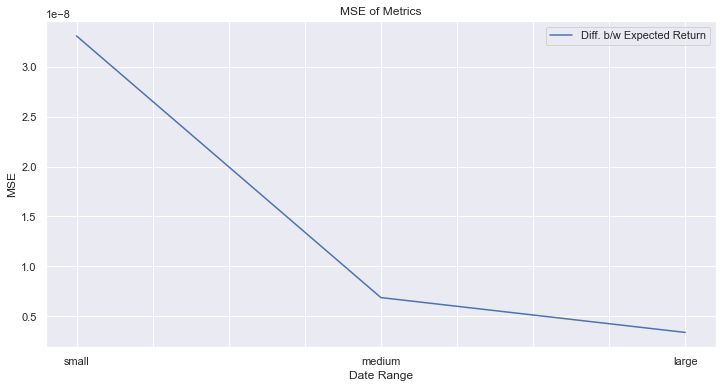

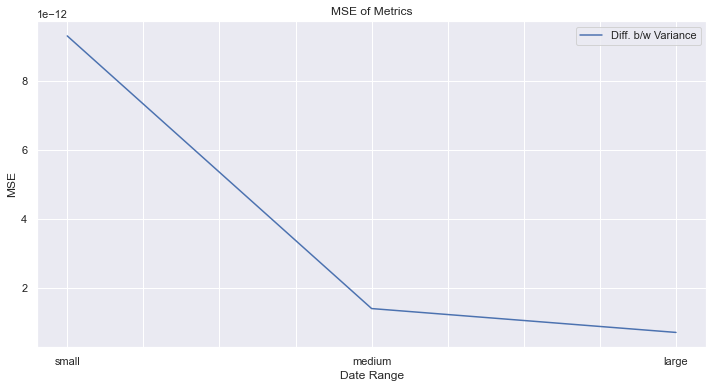

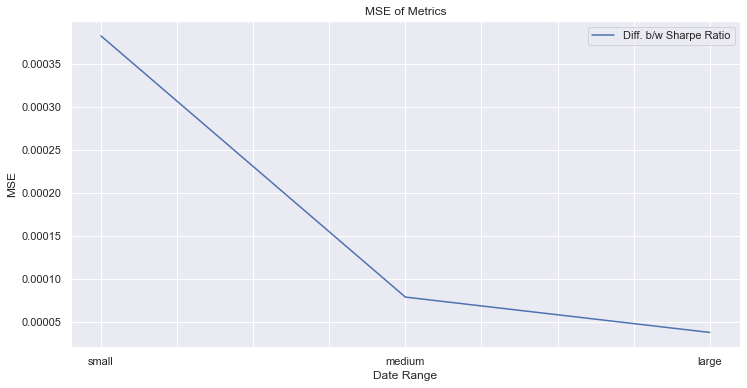

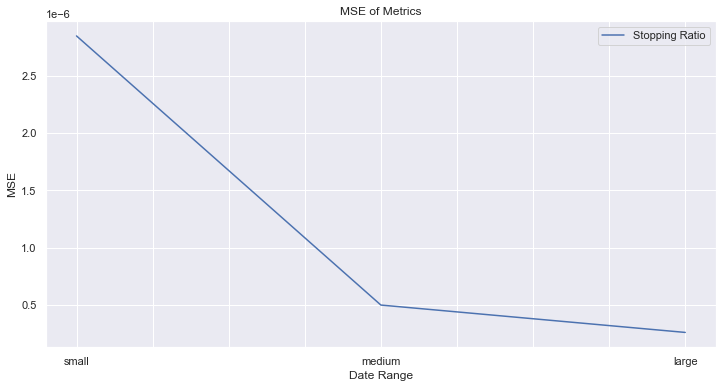

In [64]:
# Plot the result
results = pd.DataFrame([small_date_range_mse, medium_date_range_mse, large_date_range_mse])
results.index = ["small", "medium", "large"]
for c in results.columns:
    results[c].plot(legend = True, title = "MSE of Metrics", xlabel = "Date Range", ylabel = "MSE")
    plt.show()

### AR(1)
If $r_t$ satisfies an AR(1)
   - $stopping \, ratio \geq -\pi + \rho \sigma, for \rho \ge 0 \,\, and \,\, reasonable \,\, stop-loss \,\, parameters$
   
We can see from the following that, as the date range getting larger, the ratio that the proposition holds will get closer to 1.

In [59]:
# Calculate the ratio that the proposition holds.
def ratio_of_proposition_holds(start_date, end_date, rho, times):
    # Set up parameters
    step = 1
    ignore_weekends = True
    mean = 0.0005
    std = 0.01
    r0 = 0.0005
    
    count = 0
    for i in range(times):
        # Generate returns Series
        ar_1_return_series = series_generator.ar_1_return_generater(mean, std, rho, r0, start_date, end_date, step, ignore_weekends)
        
        # create object
        rf_return = 0.000001
        ar_1_sl = stop_loss.StopLoss(strategy_return = ar_1_return_series, rf_return = rf_return)
        
        # Calculate numerical performance with built in policy
        policy_name = "simple_stop_loss_policy"
        config = {"gamma" : 0.02, "delta" : 0.0005, "J" : 3, "compounding" : False}
        kappa = 0
        
        performance, rst = ar_1_sl.evaluate(policy_name, config,kappa)
        
        # Calculate lower bound
        pi = (ar_1_return_series - rf_return).mean()
        lower_bound = -pi + rho*std
        
        # Compare the metric
        if performance["Stopping Ratio"] >= lower_bound:
            count += 1
            
    return count/times

In [72]:
%%time
# Compare ratios between different date ranges.
small_date_range = ("20200101", "20201231") #1 year
medium_date_range = ("20150101", "20201231") # 5 year
large_date_range = ("20100101", "20201231") # 10 year

results = []
for rho in [0.5, 0.7, 0.9]:
    small_date_range_ratio = ratio_of_proposition_holds(small_date_range[0], small_date_range[1], rho, 100)
    medium_date_range_ratio = ratio_of_proposition_holds(medium_date_range[0], medium_date_range[1], rho, 100)
    large_date_range_ratio = ratio_of_proposition_holds(large_date_range[0], large_date_range[1], rho, 100)
    results.append([small_date_range_ratio, medium_date_range_ratio, large_date_range_ratio])
    
results = pd.DataFrame(results).T
results.index = ["small", "medium", "large"]
results.columns = ["rho = 0.5", "rho = 0.7", "rho = 0.9"]

Wall time: 1min 47s


<AxesSubplot:title={'center':'Ratio that the Proposition Holds'}, xlabel='Date Range', ylabel='Ratio'>

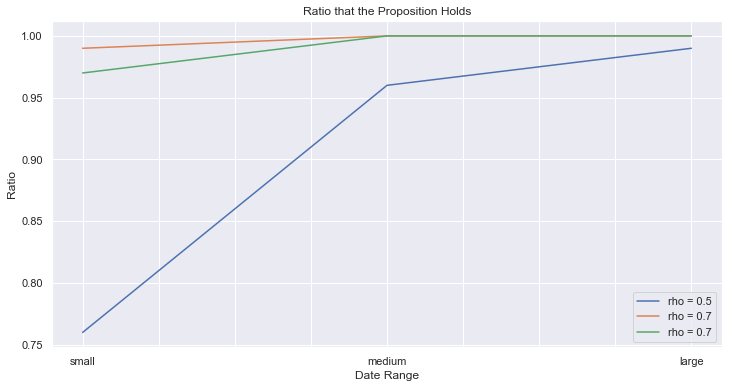

In [61]:
# Plot the result:
results.plot(legend = True, title = "Ratio that the Proposition Holds", xlabel = "Date Range", ylabel = "Ratio")

### Markov Regime-Switching Model
If $r_t$ satisfies the two-state Markov regime-switching process
   - $\Delta_\mu$ = $p_{0, 1}(r_f - \mu_1) + p_{0, 2}(r_f - \mu_2)$ 
   - $stopping \, ratio$ = $(1 - \tilde{p}_{0, 2})(r_f - \mu_1) + \tilde{p}_{0, 2}(r_f - \mu_2)$
   
We can see from the following that, as the date range getting larger, the numerical values will get closer to the theoretical values.

In [65]:
# Calculate MSE of each metrics
def mse_of_rsm_metrics(start_date, end_date, times):
    # Set up parameters
    step = 1
    ignore_weekends = True
    mean_1 = 0.0005
    std_1 = 0.01
    mean_2 = 0.0001
    std_2 = 0.02
    I0 = 1
    trans_prob_matrix = np.array([[0.8, 0.2], [0.7, 0.3]])
    
    total_loss = {}
    for i in range(times):
        # Generate returns Series
        rsm_return_series, rsm_states = series_generator.regime_switching_return_generater(mean_1, std_1, mean_2, std_2, I0, trans_prob_matrix, 
                                                                               start_date, end_date, step, ignore_weekends)
        
        # create object
        rsm_sl = stop_loss.StopLoss(strategy_return = rsm_return_series, rf_return = 0.000001)
        
        # Calculate numerical performance with built in policy
        policy_name = "simple_stop_loss_policy"
        config = {"gamma" : 0.02, "delta" : 0.0005, "J" : 3, "compounding" : False}
        kappa = 0

        performance, rst = rsm_sl.evaluate(policy_name, config,kappa)
        
        # Get regime-switching theoretical performance
        st = rsm_sl.simple_stop_loss_policy(**config)
        performance_theoretical = rsm_sl.regime_switching_theoretical_performance(st, rsm_states, mean_1, mean_2)
        
        # Calculate loss
        loss = {i: (performance[i] - performance_theoretical[i])**2 for i in performance if i in performance_theoretical}
        
        if i == 0:
            total_loss = loss
        else:
            total_loss = {i: (total_loss[i] + loss[i]) for i in total_loss if i in loss}
            
    return {i: total_loss[i]/times for i in total_loss}

In [66]:
%%time
# Compare MSEs between different date ranges.
small_date_range = ("20200101", "20201231") #1 year
medium_date_range = ("20150101", "20201231") # 5 year
large_date_range = ("20100101", "20201231") # 10 year

small_date_range_mse = mse_of_rsm_metrics(small_date_range[0], small_date_range[1], 100)
medium_date_range_mse = mse_of_rsm_metrics(medium_date_range[0], medium_date_range[1], 100)
large_date_range_mse = mse_of_rsm_metrics(large_date_range[0], large_date_range[1], 100)

Wall time: 1min 10s


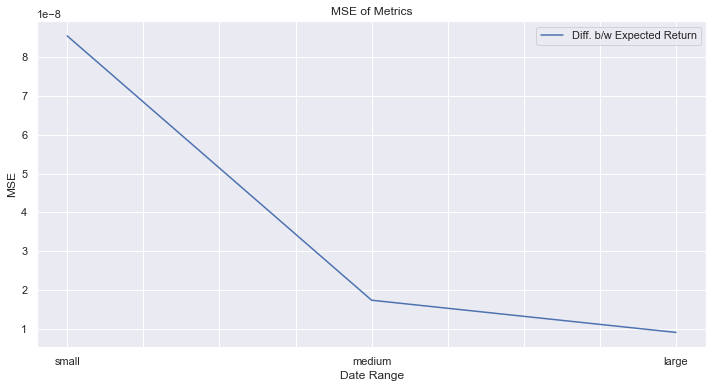

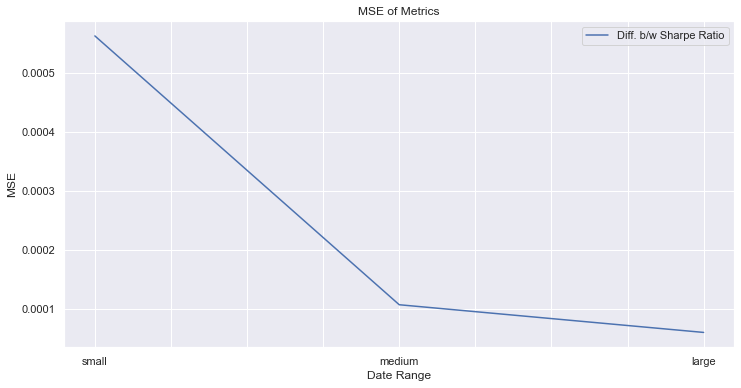

In [67]:
# Plot the result
results = pd.DataFrame([small_date_range_mse, medium_date_range_mse, large_date_range_mse])
results.index = ["small", "medium", "large"]
for c in results.columns:
    results[c].plot(legend = True, title = "MSE of Metrics", xlabel = "Date Range", ylabel = "MSE")
    plt.show()

### Momentum and mean-reverting strategy
If $r_t$ satisfies an AR(1)
   - $r_t$ can be view as a momentum strategy, for $\rho \in (0, 1)$
   - $r_t$ can be view as a mean-reverting strategy, for $\rho \in (-1, 0)$
   - Momentum strategy will benefit from a stop-loss rule, whereas a mean-reverting strategy will not.
   
We can see from the following that, momentum strategy has a high probability of benefiting from a stop-loss rule, whereas a mean-reverting strategy doesn't.

#### Momentum Strategy

In [68]:
%%time
# Set up parameters
start_date = "20100101"
end_date = "20201231"
step = 1
ignore_weekends = True
mean = 0.0005
std = 0.01
r0 = 0.0005

times = 100
count_1 = 0 
count_2 = 0
count_3 = 0

for rho in np.random.uniform(0, 1, times):
    # Generate returns Series
    ar_1_return_series = series_generator.ar_1_return_generater(mean, std, rho, r0, start_date, end_date, step, ignore_weekends)

    # create object
    rf_return = 0.000001
    ar_1_sl = stop_loss.StopLoss(strategy_return = ar_1_return_series, rf_return = rf_return)

    # Calculate numerical performance with built in policy
    policy_name = "simple_stop_loss_policy"
    config = {"gamma" : 0.02, "delta" : 0.0005, "J" : 3, "compounding" : False}
    kappa = 0

    performance, rst = ar_1_sl.evaluate(policy_name, config,kappa)
    
    if performance["Diff. b/w Expected Return"] > 0:
        count_1 += 1
        
    if performance["Diff. b/w Sharpe Ratio"] > 0:
        count_2 += 1
        
    if performance["Diff. b/w Expected Return"] > 0 and performance["Diff. b/w Sharpe Ratio"] > 0:
        count_3 += 1
    
print("Probability of Increase in Expected Return:", count_1/times)
print("Probability of Increase in  Sharpe Ratio:", count_2/times)
print("Probability of Increase in both Expected Return and Sharpe Ratio:", count_3/times)

Probability of Increase in Expected Return: 0.96
Probability of Increase in  Sharpe Ratio: 0.98
Probability of Increase in both Expected Return and Sharpe Ratio: 0.96
Wall time: 20.2 s


#### Mean-Reverting Strategy

In [69]:
# Set up parameters
start_date = "20100101"
end_date = "20201231"
step = 1
ignore_weekends = True
mean = 0.0005
std = 0.01
r0 = 0.0005

times = 100
count_1 = 0 
count_2 = 0
count_3 = 0

for rho in np.random.uniform(-1, 0, times):
    # Generate returns Series
    ar_1_return_series = series_generator.ar_1_return_generater(mean, std, rho, r0, start_date, end_date, step, ignore_weekends)

    # create object
    rf_return = 0.000001
    ar_1_sl = stop_loss.StopLoss(strategy_return = ar_1_return_series, rf_return = rf_return)

    # Calculate numerical performance with built in policy
    policy_name = "simple_stop_loss_policy"
    config = {"gamma" : 0.02, "delta" : 0.0005, "J" : 3, "compounding" : False}
    kappa = 0

    performance, rst = ar_1_sl.evaluate(policy_name, config,kappa)
    
    if performance["Diff. b/w Expected Return"] < 0:
        count_1 += 1
        
    if performance["Diff. b/w Sharpe Ratio"] < 0:
        count_2 += 1
        
    if performance["Diff. b/w Expected Return"] < 0 and performance["Diff. b/w Sharpe Ratio"] < 0:
        count_3 += 1
        
print("Probability of Decrease in Expected Return:", count_1/times)
print("Probability of Decrease in  Sharpe Ratio:", count_2/times)
print("Probability of Decrease in both Expected Return and Sharpe Ratio:", count_3/times)

Probability of Decrease in Expected Return: 1.0
Probability of Decrease in  Sharpe Ratio: 1.0
Probability of Decrease in both Expected Return and Sharpe Ratio: 1.0


## Part 4 - Compare Stop-Loss Strategies with Various Parameters

We can see from the following that, the charts are similar with Fig. 3, 4, 5 in the paper.

In [70]:
# Set up parameters
steps = [1, 5, 20, 60, 120]
windows_multipliers = [3, 5, 10]
gamma_multipliers =  [1.5, 1.2, 1, 0.8, 0.5]
target_series = daily_return["GOOG"] # It can be change to any returns series

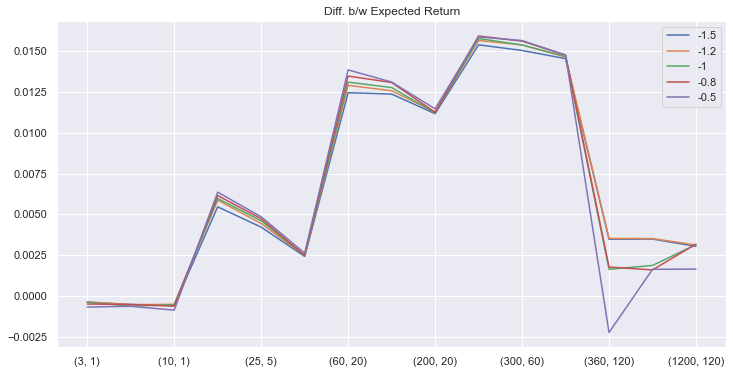

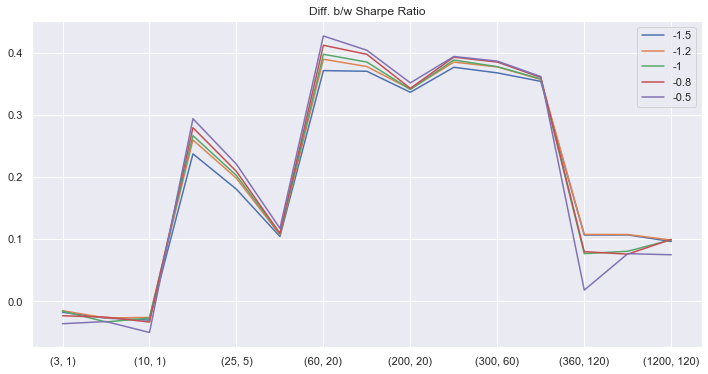

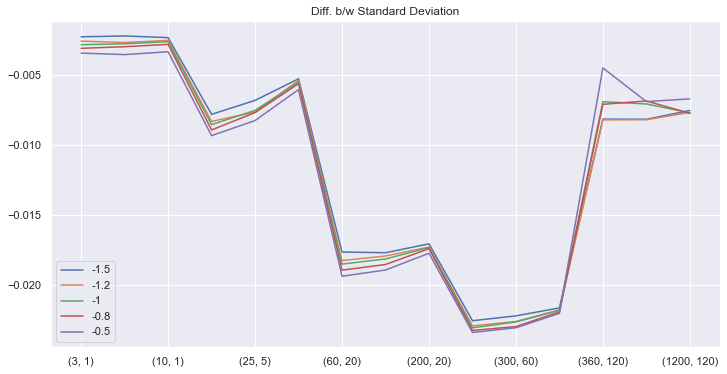

In [71]:
# Plot the charts
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

for g in [1.5, 1.2, 1, 0.8, 0.5]:
    performance_list = []
    index_list = []
    for s in steps:
        resample_target_series = (target_series + 1).rolling(s).apply(np.prod, raw = True) - 1
        sl = stop_loss.StopLoss(strategy_return = resample_target_series, rf_return = 0.000001)

        mean = resample_target_series.mean()
        std = resample_target_series.std()

        for J in [3, 5, 10]:
            policy_name = "simple_stop_loss_policy"
            config = {"gamma" : -(mean - g*std), "delta" : mean, "J" : J, "compounding" : False}
            kappa = 0

            performance, rst = sl.evaluate(policy_name, config, kappa)
            performance_list.append(performance)
            index_list.append((s*J, s))
    
    df = pd.DataFrame(performance_list)
    df.index = index_list
    
    df["Diff. b/w Expected Return"].plot(ax = ax1, label = str(-g), title = "Diff. b/w Expected Return")
    df["Diff. b/w Sharpe Ratio"].plot(ax = ax2, label = str(-g), title = "Diff. b/w Sharpe Ratio")
    df["Diff. b/w Standard Deviation"].plot(ax = ax3, label = str(-g), title = "Diff. b/w Standard Deviation")
    
ax1.legend()
ax2.legend()
ax3.legend()

---

# Conclusion

This notebook provides simple demo of the analytical framework of stop-loss policies, and show that propositions described in the paper are empirically true. However, there is still room for improvement in calculating efficiency and visualization.

# References
[Kaminski, Kathryn M., and Andrew W. Lo. (2013)](https://dspace.mit.edu/bitstream/handle/1721.1/114876/Lo_When%20Do%20Stop-Loss.pdf)